<a href="https://colab.research.google.com/github/wa-le/cybersec-jobs-EDA/blob/master/cybersec_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dtale

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()
import dtale
import dtale.app as dtale_app
%matplotlib inline

In [13]:
df0 = pd.read_csv("/content/drive/MyDrive/Data/salaries_cyber.csv")
df0

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [3]:
# Using a copy of the DataFrame
df1 = df0.copy()

In [19]:
# Quick EDA with DTALE
dtale_app.USE_COLAB = True
dtale.show(df1)

https://b7atjegvo6n-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [8]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [6]:
df1.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [7]:
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
df1["experience_level"].unique()

array(['EN', 'MI', 'EX', 'SE'], dtype=object)

In [26]:
df1["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [31]:
df1['experience_level'].replace({'EN':'Entry-Level', 'MI':'Mid-Level', 'EX':'Executive-Level', 'SE':'Senior'}, inplace=True)
df1['employment_type'].replace({'FT':'Full-Time', 'CT':'Contract', 'PT':'Part-Time', 'FL':'Freelance'}, inplace=True)
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Entry-Level,Full-Time,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,Mid-Level,Full-Time,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,Mid-Level,Full-Time,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,Mid-Level,Full-Time,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,Entry-Level,Contract,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,Mid-Level,Full-Time,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,Senior,Full-Time,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,Senior,Full-Time,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,Mid-Level,Full-Time,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [39]:
df1.job_title.value_counts().head(10)

Index(['Security Engineer', 'Cyber Security Analyst', 'Penetration Tester',
       'Information Security Manager', 'Cyber Security Engineer',
       'Security Analyst', 'Information Security Analyst',
       'Cyber Security Specialist', 'Cyber Threat Intelligence Analyst',
       'Information Security Officer'],
      dtype='object')

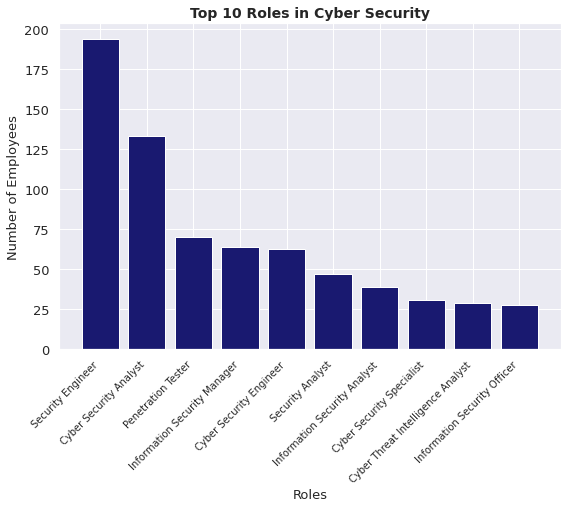

In [84]:
# Top 10 Cyber Security Roles
top_10_roles = df1.job_title.value_counts().head(10)

plt.figure(figsize= (9, 6))
plt.bar(x=top_10_roles.index, height=top_10_roles.values, color='midnightblue')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=13)
plt.xlabel("Roles", fontsize=13)
plt.ylabel("Number of Employees", fontsize=13)
plt.title("Top 10 Roles in Cyber Security", fontsize=14, fontweight='bold')
#plt.savefig("10-cybersec-roles", dpi=300, bbox_inches='tight')
plt.show()